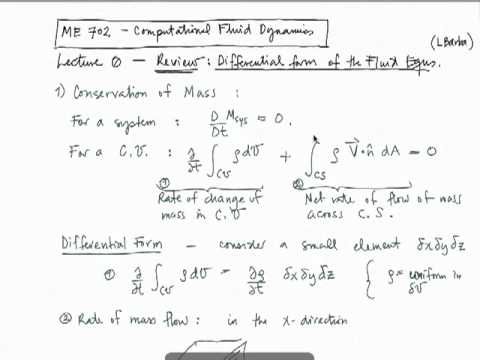

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('35unQgSaT88')

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [4]:
def rho_green_light(x,rho_light ):
    
    rho = numpy.zeros_like(x)
    mask = numpy.where(x<2.0)
    rho[mask] = rho_light*x[mask]/2.0
    return rho

In [5]:
nx = 81
L = 4.0
dx = L/(nx-1)
nt = 30
u_max = 1.0
rho_max = 10.0
rho_light = 10.0       # car density at the stoplight

x = numpy.linspace(0.0, L, num = nx)

rho0 = rho_green_light(x, rho_light)

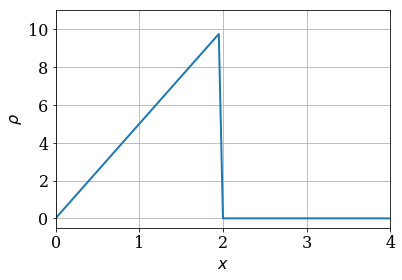

In [6]:
# Plot the initial car density on the road.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11.0);

In [7]:
def flux(rho, u_max, rho_max):
    
    F = rho*u_max*(1.0 - rho/rho_max)
    
    return F

In [8]:
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    
    for n in range(nt):
        F = flux(rho, *args)
        rho[1:] = rho[1:] -dt/dx*(F[1:]-F[:-1])
        rho[0] = bc_value
        rho_hist.append(rho.copy())
        
        return rho_hist

In [9]:
sigma = 1.0
dt = sigma*dx/u_max

rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [10]:
from matplotlib import animation
from IPython.display import HTML

In [18]:
def update_plot(nt):
    fig = pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho_hist[nt],
                    color='C0', linestyle='-', linewidth=2)[0]
    pyplot.xlim(0.0, L)
    pyplot.ylim(-0.5, 11.0)
    fig.tight_layout()

    fig.suptitle('Time step {:0>2}'.format(nt))


interactive(children=(IntSlider(value=0, description='nt', max=30), Output()), _dom_classes=('widget-interact'…

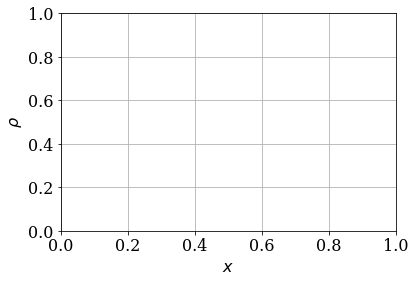

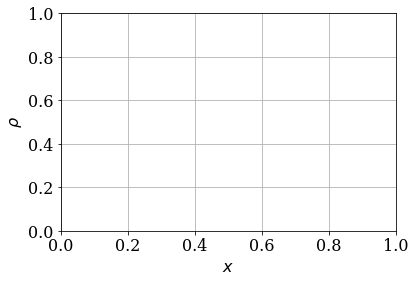

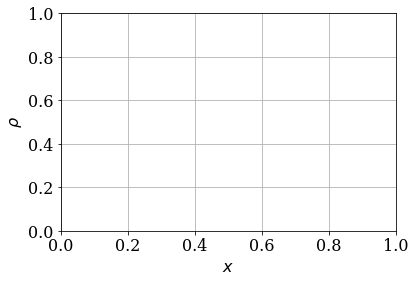

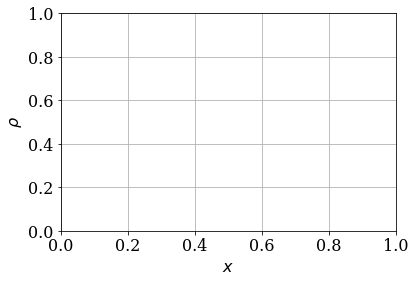

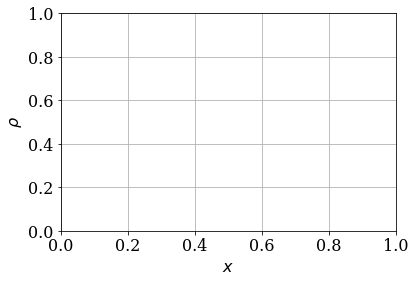

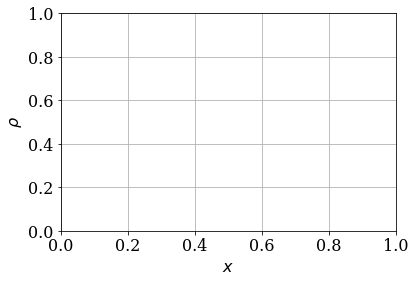

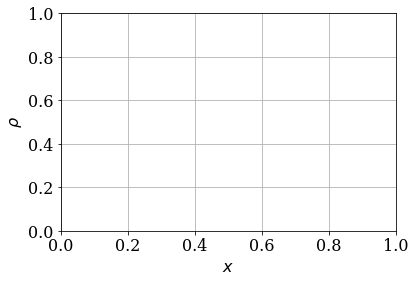

In [20]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min = 0, max=nt, step=1, descripton = 'time step')
w = ipywidgets.interactive(update_plot, nt=nt_slider)
display(w)

In [ ]:
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
HTML(anim.to_html5_video())

In [ ]:
# Modify some parameters.
nt = 40  # number of time step to compute
rho_light = 5.0  # car density at the stoplight

# Compute the initial traffic density.
rho0 = rho_green_light(x, rho_light)

# Plot the initial traffic density.
def update_plot1(nt):
    fig = pyplot.figure(figsize=(6.0, 4.0))
    pyplot.xlabel(r'$x$')
    pyplot.ylabel(r'$\rho$')
    pyplot.grid()
    line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
    pyplot.hlines(rho_max / 2.0, 0.0, L,
              label=r'$\rho_{max} / 2$',
              color='black', linestyle='--', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(-0.5, 11.0)
    fig.tight_layout()


In [ ]:
import ipywidgets

nt_slider = ipywidgets.IntSlider(value=0, min = 0, max=nt, step=1, descripton = 'time step')
w = ipywidgets.interactive(update_plot1, nt=nt_slider)
display(w)

In [ ]:
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)

HTML(anim.to_html5_video())

In [ ]:
rho_light = 4.0
u_max = 1.1

rho0 = rho_green_light(x, rho_light)
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
HTML(anim.to_html5_video())